# Working On HealthAnalytic Dataset

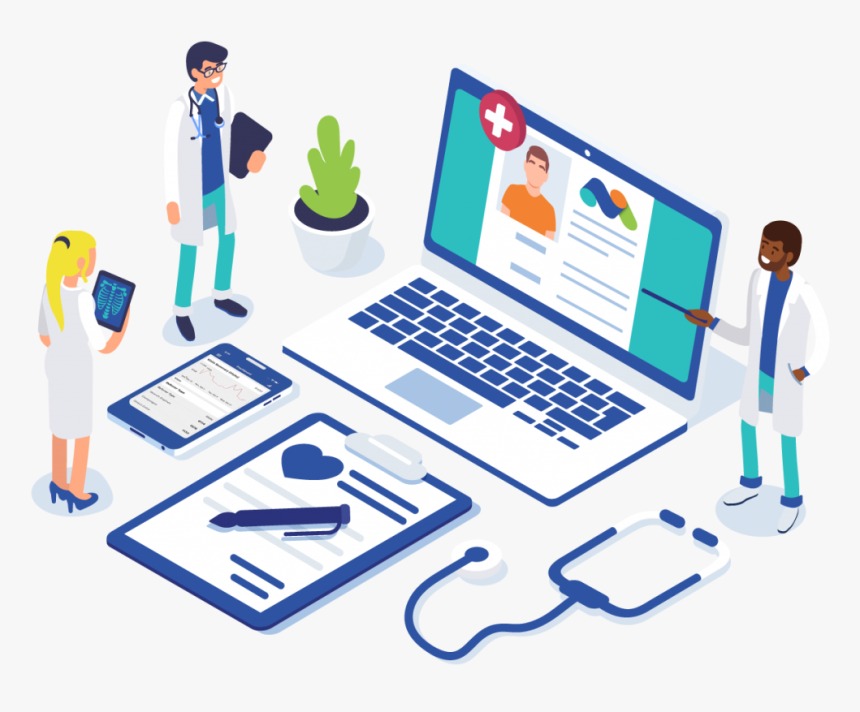

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

**Variable Features of the datasets to be represented below**

In [2]:
patient_profiles=pd.read_csv('Patient_Profile.csv')
patient_profiles=patient_profiles.dropna()
patient_profiles.head()
patient_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2651 entries, 1 to 37548
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient_ID         2651 non-null   int64 
 1   Online_Follower    2651 non-null   int64 
 2   LinkedIn_Shared    2651 non-null   int64 
 3   Twitter_Shared     2651 non-null   int64 
 4   Facebook_Shared    2651 non-null   int64 
 5   Income             2651 non-null   object
 6   Education_Score    2651 non-null   object
 7   Age                2651 non-null   object
 8   First_Interaction  2651 non-null   object
 9   City_Type          2651 non-null   object
 10  Employer_Category  2651 non-null   object
dtypes: int64(5), object(6)
memory usage: 186.4+ KB


In [3]:
patient_profiles.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others
9,487977,0,1,1,0,4,72,58,08-Jun-03,G,Technology


<AxesSubplot:xlabel='Age', ylabel='count'>

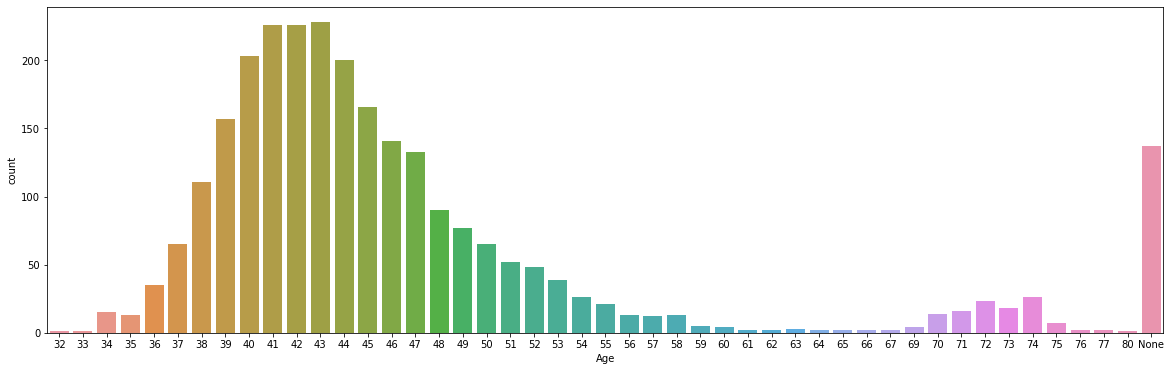

In [4]:
plt.figure(figsize=(20,6))
sns.countplot(patient_profiles.sort_values('Age').Age)

**People of Age group of 39-45 were the more ones to the health camps**

<AxesSubplot:xlabel='City_Type', ylabel='count'>

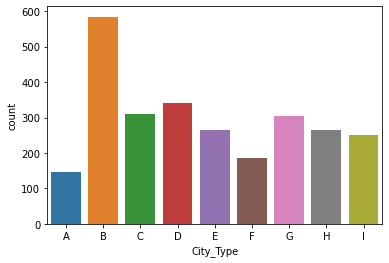

In [5]:
sns.countplot(patient_profiles.sort_values('City_Type').City_Type)

Details about First Camp Held

In [6]:
first_camp=pd.read_csv('First_Health_Camp_Attended.csv')
first_camp=first_camp.iloc[:,:4]
first_camp=first_camp.dropna()
first_camp.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


In [7]:
first_camp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6218 entries, 0 to 6217
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      6218 non-null   int64  
 1   Health_Camp_ID  6218 non-null   int64  
 2   Donation        6218 non-null   int64  
 3   Health_Score    6218 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 242.9 KB


In [8]:
first_camp.corr()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
Patient_ID,1.000000,-0.007449,0.009080,-0.015951
Health_Camp_ID,-0.007449,1.000000,-0.028046,-0.002384
Donation,0.009080,-0.028046,1.000000,0.411888
Health_Score,-0.015951,-0.002384,0.411888,1.000000


**This Shows a good relation of Donation And Health Score**

Text(0, 0.5, 'Health_Score')

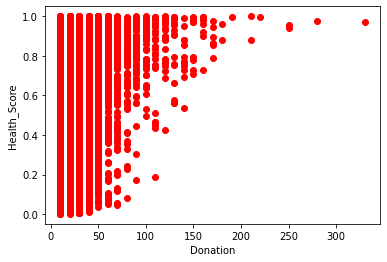

In [9]:
plt.scatter(first_camp['Donation'],first_camp['Health_Score'],color='red')
plt.xlabel('Donation',fontsize=10)
plt.ylabel('Health_Score',fontsize=10)

Details about the Second camp Held

In [11]:
second_camp=pd.read_csv('Second_Health_Camp_Attended.csv')
second_camp=second_camp.dropna()
second_camp.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


<AxesSubplot:xlabel='Health Score'>

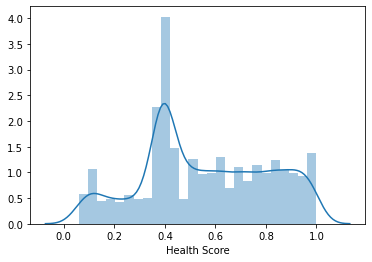

In [12]:
sns.distplot(second_camp['Health Score'])

Third Camp

In [13]:
third_camp=pd.read_csv('Third_Health_Camp_Attended.csv')
third_camp=third_camp.dropna()
third_camp.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,510954,6528,2,2


Training Set

In [14]:
train=pd.read_csv('Train.csv')
train=train.dropna()
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


Merging Patient proflies and first Camp DataFrames

In [15]:
merged=pd.merge(patient_profiles,first_camp,how='inner',on='Patient_ID').set_index('Health_Camp_ID')
merged['City_Type']=merged['City_Type'].replace({'D':4,'A':1,'B':2,'C':3,'E':5,'F':6,'G':7,'H':8,'I':9})
merged['Employer_Category']=merged['Employer_Category'].replace({'BFSI':0,'Technology':1, 'Education':2, 'Consulting':3, 'Manufacturing':4,
       'Software Industry':5, 'Others':6, 'Health':7, 'Retail':8, 'Transport':9,
       'Broadcasting':10, 'Food':11, 'Telecom':12, 'Real Estate':13})
merged=merged.drop(merged.iloc[:,1:5],axis=1) 
merged=merged[(merged['Income']!='None')&(merged['Age']!='None')&(merged['Education_Score']!='None')]
merged['Income']=merged['Income'].astype('float')
merged['Age']=merged['Age'].astype('float')
merged['Education_Score']=merged['Education_Score'].astype('float')
merged.head()


,Patient_ID,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score
Health_Camp_ID,,,,,,,,,
6543,508307,3.0,87.0,46.0,02-Nov-02,4,0,30,0.160822
6537,508307,3.0,87.0,46.0,02-Nov-02,4,0,20,0.056017
6560,487977,4.0,72.0,58.0,08-Jun-03,7,1,40,0.926829
6585,487977,4.0,72.0,58.0,08-Jun-03,7,1,60,0.773399
6561,487977,4.0,72.0,58.0,08-Jun-03,7,1,40,0.309091


Creating Age Groups

In [16]:
def Agegroup(x):
    if x<=35:
        return 'Young Group'
    if x<=50:
        return 'Adult Group'
    if x>50:
        return 'Old Group'
merged['Age_Group']=merged['Age'].apply(Agegroup)
merged.head()

,Patient_ID,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Age_Group
Health_Camp_ID,,,,,,,,,,
6543,508307,3.0,87.0,46.0,02-Nov-02,4,0,30,0.160822,Adult Group
6537,508307,3.0,87.0,46.0,02-Nov-02,4,0,20,0.056017,Adult Group
6560,487977,4.0,72.0,58.0,08-Jun-03,7,1,40,0.926829,Old Group
6585,487977,4.0,72.0,58.0,08-Jun-03,7,1,60,0.773399,Old Group
6561,487977,4.0,72.0,58.0,08-Jun-03,7,1,40,0.309091,Old Group


In [17]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1478 entries, 6543 to 6532
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1478 non-null   int64  
 1   Income             1478 non-null   float64
 2   Education_Score    1478 non-null   float64
 3   Age                1478 non-null   float64
 4   First_Interaction  1478 non-null   object 
 5   City_Type          1478 non-null   int64  
 6   Employer_Category  1478 non-null   int64  
 7   Donation           1478 non-null   int64  
 8   Health_Score       1478 non-null   float64
 9   Age_Group          1478 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 115.5+ KB


In [18]:
merged.corr()

,Patient_ID,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Health_Score
Patient_ID,1.000000,-0.055604,-0.035972,-0.069635,0.010140,-0.013517,0.045746,0.006284
Income,-0.055604,1.000000,0.131872,0.328679,-0.131683,-0.131963,0.038105,-0.001010
Education_Score,-0.035972,0.131872,1.000000,-0.239717,-0.133970,-0.134044,-0.000955,-0.018010
Age,-0.069635,0.328679,-0.239717,1.000000,-0.092567,-0.014113,0.124757,0.101601
City_Type,0.010140,-0.131683,-0.133970,-0.092567,1.000000,0.058464,0.026434,-0.012412
Employer_Category,-0.013517,-0.131963,-0.134044,-0.014113,0.058464,1.000000,0.010845,0.047013
Donation,0.045746,0.038105,-0.000955,0.124757,0.026434,0.010845,1.000000,0.414067
Health_Score,0.006284,-0.001010,-0.018010,0.101601,-0.012412,0.047013,0.414067,1.000000


More Dominant features towrads good health Score are Donation,Age

Text(0.5, 1.0, 'Comparision of Health Score and the Age_Group')

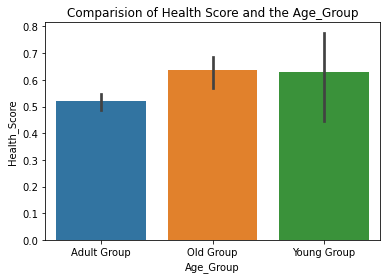

In [19]:
sns.barplot(x='Age_Group',y='Health_Score',data=merged,estimator=np.median)
plt.title('Comparision of Health Score and the Age_Group')

Merging Training Set with Above merged dataframes

In [20]:
Train=pd.merge(train,merged,how='inner',on='Patient_ID')
Train=Train.drop(['Registration_Date','First_Interaction','Health_Camp_ID'],axis=1)
Train=Train.drop_duplicates()
grouped=Train.groupby(['Patient_ID'])['Var1','Var2','Var3','Var4','Var5','Income','Education_Score','Age','City_Type','Employer_Category','Donation','Health_Score'].mean()
grouped.head()

<ipython-input-20-f7cc96d7c0eb>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped=Train.groupby(['Patient_ID'])['Var1','Var2','Var3','Var4','Var5','Income','Education_Score','Age','City_Type','Employer_Category','Donation','Health_Score'].mean()


,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Health_Score
Patient_ID,,,,,,,,,,,,
485720,0.0000,0.0000,0.0,0.00,0.000,1.0,80.000000,44.0,3.0,6.0,20.0,0.585971
486133,7.7500,2.2500,0.0,0.25,6.500,2.0,68.000000,52.0,4.0,1.0,45.0,0.672917
486155,0.0000,0.0000,0.0,0.00,0.000,2.0,88.000000,42.0,2.0,1.0,55.0,0.625503
486306,1.0000,0.0000,0.0,0.00,0.000,4.0,77.000000,47.0,9.0,3.0,20.0,0.461575
486358,6.5625,0.8125,0.0,0.50,2.375,2.0,83.756667,41.0,3.0,0.0,24.0,0.425470


Creating column called prediction with Health Score >0.55 as 1 and less than it to 0

In [21]:
grouped['Prediction']=np.where(grouped['Health_Score']>0.55,1,0)
grouped.head()

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Health_Score,Prediction
Patient_ID,,,,,,,,,,,,,
485720,0.0000,0.0000,0.0,0.00,0.000,1.0,80.000000,44.0,3.0,6.0,20.0,0.585971,1
486133,7.7500,2.2500,0.0,0.25,6.500,2.0,68.000000,52.0,4.0,1.0,45.0,0.672917,1
486155,0.0000,0.0000,0.0,0.00,0.000,2.0,88.000000,42.0,2.0,1.0,55.0,0.625503,1
486306,1.0000,0.0000,0.0,0.00,0.000,4.0,77.000000,47.0,9.0,3.0,20.0,0.461575,0
486358,6.5625,0.8125,0.0,0.50,2.375,2.0,83.756667,41.0,3.0,0.0,24.0,0.425470,0


In [22]:
grouped['Range_for_Health_Score']=pd.cut(grouped.Health_Score,bins=10)
grouped.head()

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Health_Score,Prediction,Range_for_Health_Score
Patient_ID,,,,,,,,,,,,,,
485720,0.0000,0.0000,0.0,0.00,0.000,1.0,80.000000,44.0,3.0,6.0,20.0,0.585971,1,"(0.509, 0.606]"
486133,7.7500,2.2500,0.0,0.25,6.500,2.0,68.000000,52.0,4.0,1.0,45.0,0.672917,1,"(0.606, 0.703]"
486155,0.0000,0.0000,0.0,0.00,0.000,2.0,88.000000,42.0,2.0,1.0,55.0,0.625503,1,"(0.606, 0.703]"
486306,1.0000,0.0000,0.0,0.00,0.000,4.0,77.000000,47.0,9.0,3.0,20.0,0.461575,0,"(0.411, 0.509]"
486358,6.5625,0.8125,0.0,0.50,2.375,2.0,83.756667,41.0,3.0,0.0,24.0,0.425470,0,"(0.411, 0.509]"


Show count of people in different Health_Score Range

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(0.0219, 0.12]'),
  Text(1, 0, '(0.12, 0.217]'),
  Text(2, 0, '(0.217, 0.314]'),
  Text(3, 0, '(0.314, 0.411]'),
  Text(4, 0, '(0.411, 0.509]'),
  Text(5, 0, '(0.509, 0.606]'),
  Text(6, 0, '(0.606, 0.703]'),
  Text(7, 0, '(0.703, 0.8]'),
  Text(8, 0, '(0.8, 0.897]'),
  Text(9, 0, '(0.897, 0.994]')])

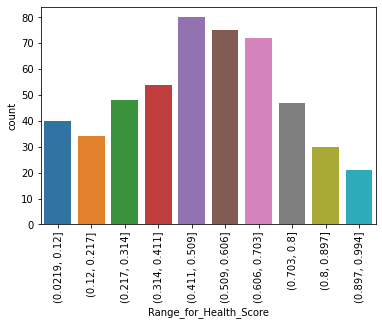

In [23]:
sns.countplot(grouped.sort_values('Range_for_Health_Score').Range_for_Health_Score)
plt.xticks(rotation=90)

Shows range of (0.41-0.5) for Health_Score is the most one

Merging again with the third camp dataframe

In [24]:
Group=grouped.reset_index()
Merge=pd.merge(grouped,third_camp,how='inner',on='Patient_ID')
Merge=Merge.drop(['Health_Camp_ID'],axis=1)
Merge=Merge.drop_duplicates()
Merge.head()

,Patient_ID,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Health_Score,Prediction,Range_for_Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number
0,485720,0.0000,0.0000,0.0,0.00,0.000,1.0,80.000000,44.0,3.0,6.0,20.0,0.585971,1,"(0.509, 0.606]",1,1
1,486133,7.7500,2.2500,0.0,0.25,6.500,2.0,68.000000,52.0,4.0,1.0,45.0,0.672917,1,"(0.606, 0.703]",4,1
2,486133,7.7500,2.2500,0.0,0.25,6.500,2.0,68.000000,52.0,4.0,1.0,45.0,0.672917,1,"(0.606, 0.703]",6,4
3,486306,1.0000,0.0000,0.0,0.00,0.000,4.0,77.000000,47.0,9.0,3.0,20.0,0.461575,0,"(0.411, 0.509]",5,1
4,486358,6.5625,0.8125,0.0,0.50,2.375,2.0,83.756667,41.0,3.0,0.0,24.0,0.425470,0,"(0.411, 0.509]",3,2


In [25]:
Merge.corr()

,Patient_ID,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Health_Score,Prediction,Number_of_stall_visited,Last_Stall_Visited_Number
Patient_ID,1.000000,-0.059103,-0.054556,-0.033006,-0.034764,-0.077917,0.054996,0.011474,-0.008301,-0.044180,0.018307,0.067782,0.005033,0.002098,-0.014722,-0.007781
Var1,-0.059103,1.000000,0.898343,0.752873,0.583410,0.795129,0.033353,-0.038866,0.045815,-0.027256,-0.034507,0.059757,0.102361,0.112546,0.015237,-0.046110
Var2,-0.054556,0.898343,1.000000,0.577335,0.469128,0.689043,0.073876,0.021772,0.065485,-0.051266,-0.058678,0.041082,0.028318,0.058135,-0.006430,-0.067293
Var3,-0.033006,0.752873,0.577335,1.000000,0.455928,0.504707,0.102498,0.006942,0.049083,-0.044047,-0.065079,0.016759,0.098378,0.082712,0.010559,-0.047937
Var4,-0.034764,0.583410,0.469128,0.455928,1.000000,0.717310,-0.056441,-0.039788,-0.064414,0.027736,0.044881,-0.001913,0.073129,0.057183,0.072145,0.030752
Var5,-0.077917,0.795129,0.689043,0.504707,0.717310,1.000000,-0.043020,-0.062126,0.048623,-0.034737,-0.001643,0.085859,0.132101,0.126982,0.084591,-0.015556
Income,0.054996,0.033353,0.073876,0.102498,-0.056441,-0.043020,1.000000,0.000591,0.372848,-0.155837,-0.113223,0.084211,0.045234,0.029820,-0.081963,-0.056646
Education_Score,0.011474,-0.038866,0.021772,0.006942,-0.039788,-0.062126,0.000591,1.000000,-0.174793,-0.135303,-0.096033,-0.038109,-0.043917,-0.021905,0.043517,0.009753
Age,-0.008301,0.045815,0.065485,0.049083,-0.064414,0.048623,0.372848,-0.174793,1.000000,-0.058583,-0.064781,0.135027,0.095052,0.011129,0.051903,0.026673
City_Type,-0.044180,-0.027256,-0.051266,-0.044047,0.027736,-0.034737,-0.155837,-0.135303,-0.058583,1.000000,0.072323,0.095470,0.079287,0.049180,0.010975,0.051568


**Shows all the Vars are  highly correlated to each other

<AxesSubplot:>

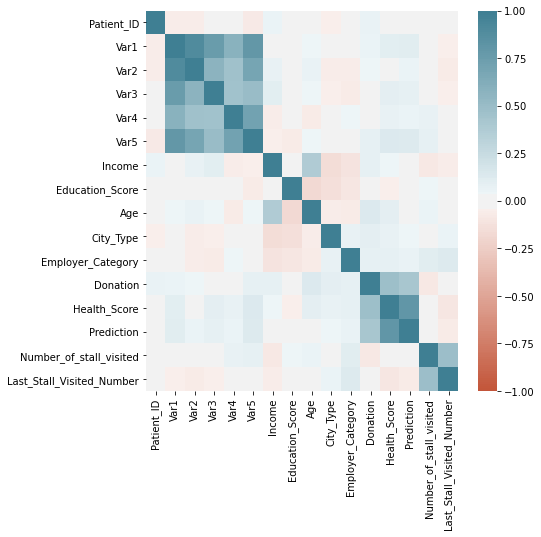

In [26]:
plt.figure(figsize=(7,7))
sns.heatmap(Merge.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(20,220,n=200))

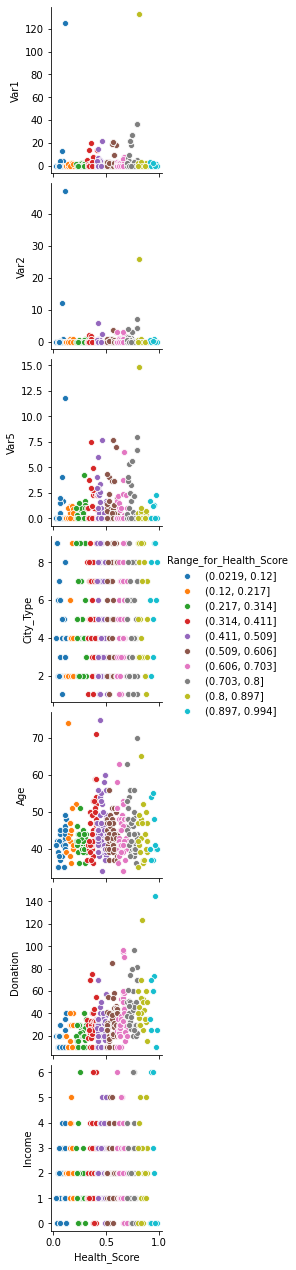

In [27]:
sns.pairplot(data=Merge,x_vars=['Health_Score'],y_vars=['Var1','Var2','Var5','City_Type','Age','Donation','Income'],hue='Range_for_Health_Score')

<AxesSubplot:xlabel='Number_of_stall_visited', ylabel='Last_Stall_Visited_Number'>

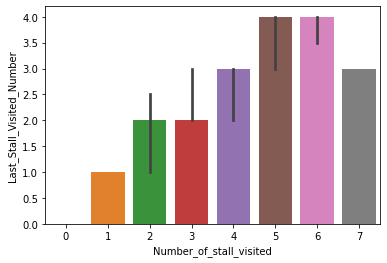

In [28]:
sns.barplot(x='Number_of_stall_visited',y='Last_Stall_Visited_Number',data=Merge,estimator=np.median)

Model Preparation

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
x=Merge[['Var1','Var2','Var5','City_Type','Age','Donation','Income','Number_of_stall_visited','Last_Stall_Visited_Number']]
y=Merge[['Prediction']]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [30]:
lr=LogisticRegression(solver='newton-cg',C=10,fit_intercept=True,intercept_scaling=10,dual=False,penalty='l2').fit(x_train,y_train)
pred=lr.predict(x_test)

c:\users\tejveer singh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
classification=metrics.classification_report(
    digits=4,
    y_true=y_test,
    y_pred=pred)
print(classification)

              precision    recall  f1-score   support

           0     0.7792    0.8824    0.8276        68
           1     0.7500    0.5854    0.6575        41

    accuracy                         0.7706       109
   macro avg     0.7646    0.7339    0.7426       109
weighted avg     0.7682    0.7706    0.7636       109



c:\users\tejveer singh\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-32-b5f1a89bf501>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


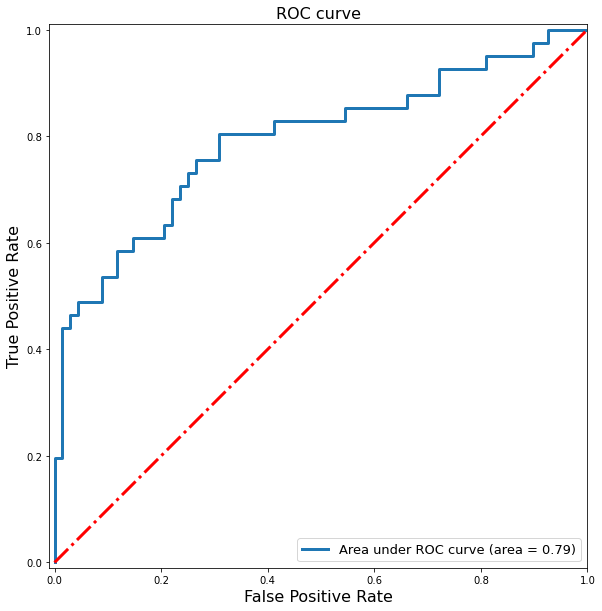

In [32]:
y_score_lr = lr.fit(x_train, y_train).decision_function(x_test)
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, y_score_lr)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
plt.figure(figsize=(10,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='Area under ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='dashdot')
plt.axes().set_aspect('equal')
plt.show()

Checking on Test Set

In [33]:
test=pd.read_csv('test.csv')
test=test.dropna()
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [34]:
Test=pd.merge(test,merged,how='inner',on='Patient_ID')
Test=Test.drop(['Registration_Date','First_Interaction','Health_Camp_ID'],axis=1)
Test=Test.drop_duplicates()
group_test=Test.groupby(['Patient_ID'])['Var1','Var2','Var5','Income','Age','City_Type','Donation'].mean()
group_test=group_test.reset_index()
grouped_test=pd.merge(group_test,third_camp,how='inner',on='Patient_ID')
grouped_test=grouped_test.drop(['Health_Camp_ID'],axis=1)
grouped_test=grouped_test.drop_duplicates()
grouped_test.head()

<ipython-input-34-7b35a05be570>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_test=Test.groupby(['Patient_ID'])['Var1','Var2','Var5','Income','Age','City_Type','Donation'].mean()


,Patient_ID,Var1,Var2,Var5,Income,Age,City_Type,Donation,Number_of_stall_visited,Last_Stall_Visited_Number
0,485720,0.000000,0.000000,0.0,1.0,44.0,3.0,20.0,1,1
1,486133,9.333333,3.000000,8.0,2.0,52.0,4.0,45.0,4,1
2,486133,9.333333,3.000000,8.0,2.0,52.0,4.0,45.0,6,4
3,486306,1.000000,0.000000,0.0,4.0,47.0,9.0,20.0,5,1
4,486358,9.500000,1.166667,4.0,2.0,41.0,3.0,24.0,3,2


In [35]:
X=grouped_test[['Var1','Var2','Var5','Income','Age','City_Type','Donation','Number_of_stall_visited','Last_Stall_Visited_Number']]
test_predict=lr.predict(X)

In [36]:
df=pd.DataFrame(test_predict,columns=['Prediction'],index=grouped_test['Patient_ID'])
test_merge=pd.merge(grouped_test,df,how='inner',on='Patient_ID').drop_duplicates()
test_merge.head()

,Patient_ID,Var1,Var2,Var5,Income,Age,City_Type,Donation,Number_of_stall_visited,Last_Stall_Visited_Number,Prediction
0,485720,0.000000,0.000000,0.0,1.0,44.0,3.0,20.0,1,1,0
1,486133,9.333333,3.000000,8.0,2.0,52.0,4.0,45.0,4,1,0
3,486133,9.333333,3.000000,8.0,2.0,52.0,4.0,45.0,6,4,0
5,486306,1.000000,0.000000,0.0,4.0,47.0,9.0,20.0,5,1,0
6,486358,9.500000,1.166667,4.0,2.0,41.0,3.0,24.0,3,2,0
